# Mnist Dataset prediction (Computer Vision - Image Classification)

In [53]:
#Import statements
import seaborn as sns #data viz library
import matplotlib.pyplot as plt #data viz library
from sklearn.model_selection import train_test_split # Split data into train and test sets
from tqdm.auto import tqdm # Import tqdm for progress bar

#Torch import statements
import torch #General torch library
from torch import nn #Basic Building Blocks for pytorch
from torch.utils.data import DataLoader #Mini batch data loader
from torch.utils.data import Dataset #Custom dataset
from torchvision import transforms #Data Augmentation

In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## Data Preparation and exploration 

In [55]:
#Load the data
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#Preview of test data
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#Extract the ground truth labels of dataset
y_train = train_data.label

# Drop 'label' column
X_train = train_data.drop(labels = ["label"],axis = 1) 

X_train.head(), y_train.head()

(   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0       0       0       0       0       0       0       0       0       0   
 1       0       0       0       0       0       0       0       0       0   
 2       0       0       0       0       0       0       0       0       0   
 3       0       0       0       0       0       0       0       0       0   
 4       0       0       0       0       0       0       0       0       0   
 
    pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
 0       0  ...         0         0         0         0         0         0   
 1       0  ...         0         0         0         0         0         0   
 2       0  ...         0         0         0         0         0         0   
 3       0  ...         0         0         0         0         0         0   
 4       0  ...         0         0         0         0         0         0   
 
    pixel780  pixel781  pixel782  pixel783  
 0       

In [58]:
#Retrieve the shape of data
X_train.shape, y_train.shape

((42000, 784), (42000,))

### There are in total 784 columns representing the various pixel values for a **28x28 Image Matrix**

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

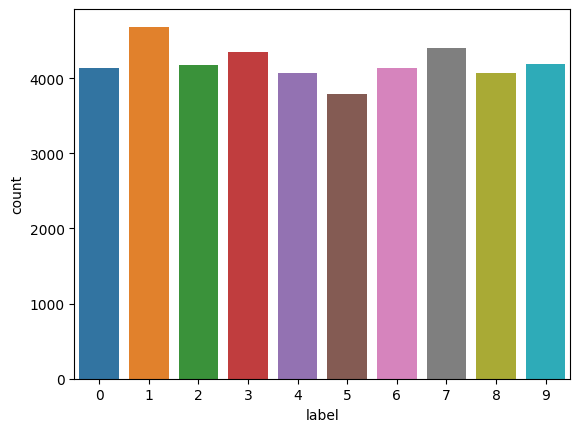

In [59]:
print(y_train.value_counts())
sns.countplot(data=train_data, x="label")

### The labels are well-balanced and is not overtly skewed to certain target labels. Accuracy can be a good metric, in addition to the training/test loss.

In [60]:
print(y_train.isna().sum())
X_train.isna().sum().sum()

0


0

### There is no missing pixel values for all rows in the dataset. Similarly, there is no missing label for even an image.

In [61]:
#Converting y_train to numpy for consistency in types with X_train
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [62]:
type(y_train[10])

numpy.int64

In [63]:
X_train.shape

(42000, 784)

### Reshape the rows to a 28x28 image for **visualisation**

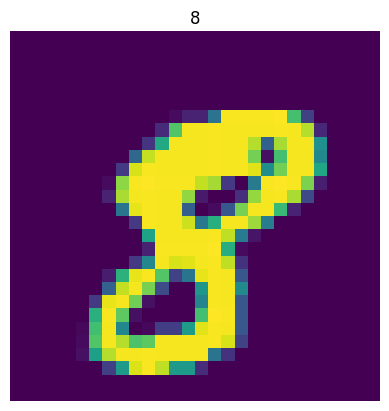

In [64]:
img = X_train[10].reshape(28,28)
plt.axis(False)
plt.title(y_train[10])
plt.imshow(img)

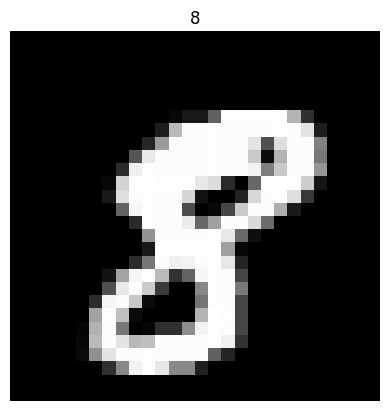

In [65]:
plt.axis(False)
plt.title(y_train[10])
plt.imshow(img, cmap="gray")

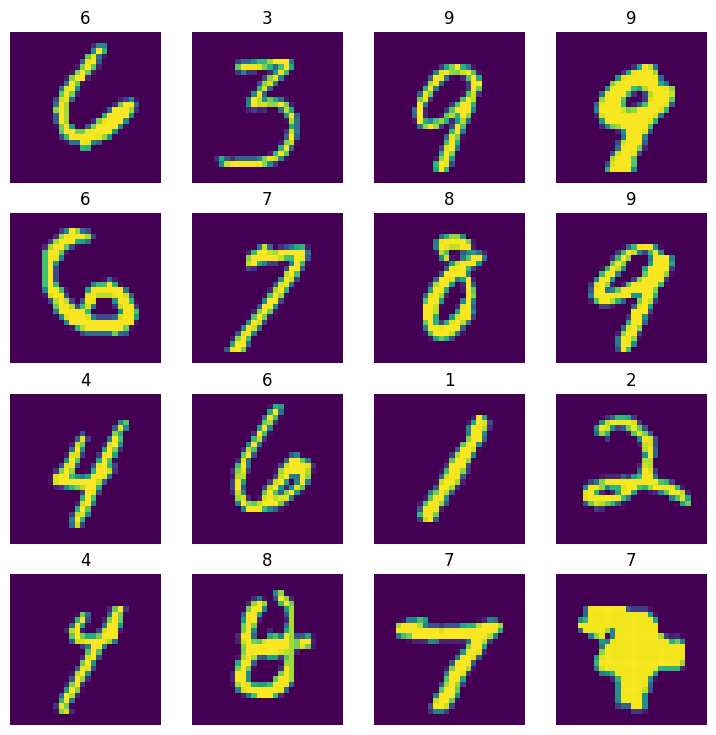

In [66]:
#Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for image_i in range(1, rows * cols + 1):
    random_idx = torch.randint(0,len(X_train),size=[1]).item()
    img, label = X_train[random_idx], y_train[random_idx]
    fig.add_subplot(rows,cols,image_i)
    plt.imshow(img.reshape(28,28))
    plt.title(label)
    plt.axis(False)

## Data Processing for Modelling

In [67]:
#Convert to tensors in particular long tensor for y_train since nn.crossentropy requires y labels to
#be long type
X_train = torch.from_numpy(X_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)

X_train[:5], y_train[:5]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([1, 0, 1, 4, 0]))

In [68]:
type(X_train), type(y_train)

(torch.Tensor, torch.Tensor)

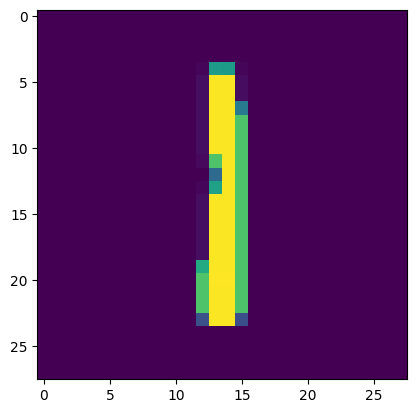

In [69]:
#Perform a sanity check once more after conversion to tensor from numpy
plt.imshow(X_train[2].reshape(28,28))

In [70]:
y_train[2].item()

1

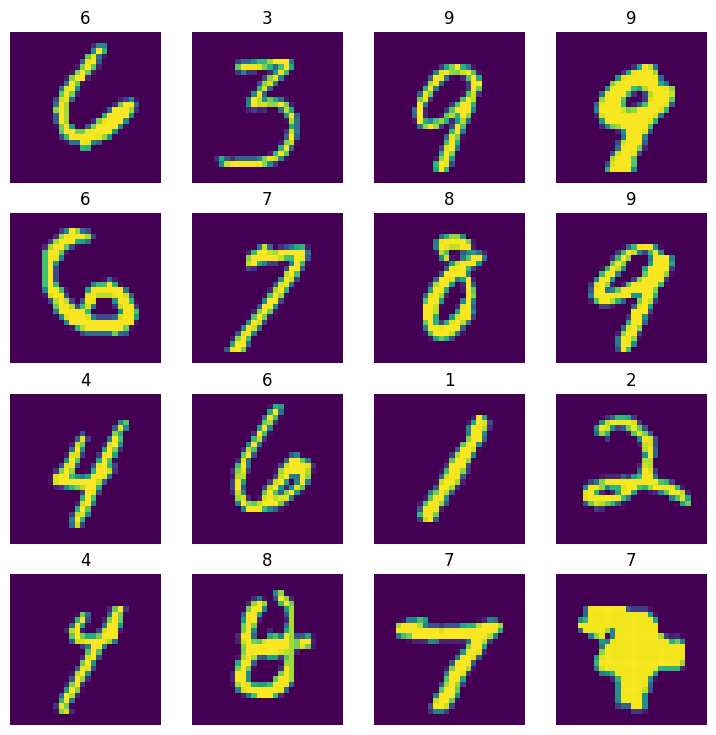

In [71]:
#Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for image_i in range(1, rows * cols + 1):
    random_idx = torch.randint(0,len(X_train),size=[1]).item()
    img, label = X_train[random_idx], y_train[random_idx].item()
    fig.add_subplot(rows,cols,image_i)
    plt.imshow(img.reshape(28,28))
    plt.title(label)
    plt.axis(False)

### Split the **training dataset** into both **training set and validation set**

In [72]:
type(X_train), X_train.shape

(torch.Tensor, torch.Size([42000, 784]))

In [73]:
X_train = X_train.reshape((42000,28,28))
X_train = X_train.unsqueeze(dim=1)

In [74]:
X_train.shape, y_train.shape

(torch.Size([42000, 1, 28, 28]), torch.Size([42000]))

In [75]:
#Set the random seed for reproduciblity
RANDOM_SEED = 42

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.15, # 15% test, 85% train
                                                    random_state=RANDOM_SEED) # make the random split reproducible
len(X_train), len(X_val), len(y_train), len(y_val)

(35700, 6300, 35700, 6300)

### The train dataset consists of 35700 samples, while the validation dataset consists of 6300 samples

In [76]:
#Batch Size hyperparameter
batch_size = 32

train_tensors = torch.utils.data.TensorDataset(X_train,y_train)
val_tensors = torch.utils.data.TensorDataset(X_val,y_val)

# Turn dataset into iterables of mini batches
#Shuffle is true for training to prevent learning of spurious correlation or noise
train_dataloader = DataLoader(train_tensors, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_tensors, batch_size=batch_size, shuffle=False)

print(f"Dataloaders: {train_dataloader,val_dataloader}")
print(f"Length of train dataloaders: {len(train_dataloader)} of batch size {batch_size}")
print(f"Length of validation dataloaders: {len(val_dataloader)} of batch size {batch_size}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c89fcd09db0>, <torch.utils.data.dataloader.DataLoader object at 0x7c89fcd0a590>)
Length of train dataloaders: 1116 of batch size 32
Length of validation dataloaders: 197 of batch size 32


In [77]:
train_tensors.tensors[0].shape, train_tensors.tensors[1].shape

(torch.Size([35700, 1, 28, 28]), torch.Size([35700]))

Text(0.5, 1.0, '0')

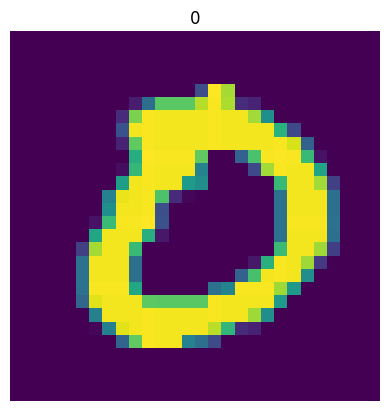

In [78]:
#Sanity check by samplingacos from train dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
plt.imshow(train_features_batch[10].reshape(28,28))
plt.axis(False)
plt.title(train_labels_batch[10].item())

### The dataloader is returning the image and it's respective label accordingly

## Modelling

In [79]:
#Set up device agnostic code - either GPU or CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

### Create a baseline for comparison of performance with subsequent iterative improvements

In [80]:
class VGGNetBaseline(nn.Module):
    """ Replicating subset of VGGNet Architecture for MNIST"""
    
    def __init__(self):
        super().__init__()
        
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=(3,3),stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=(3,3),stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )

        
        #From kaggle pytorch tutorial
#         self.block_1 = nn.Sequential(
#              nn.Conv2d(in_channels=1,out_channels=16,kernel_size=(5,5),stride=1,padding=0),
#              nn.ReLU(),
#              nn.MaxPool2d(kernel_size=2),
#              nn.Conv2d(in_channels=16,out_channels=34,kernel_size=(5,5),stride=1,padding=0),
#              nn.ReLU(),
#              nn.MaxPool2d(kernel_size=(2,2))
#          )

               
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=(6272),out_features=10)
        )
        
    def forward(self,x):
        x = self.block_1(x)
        x = self.classifier(x)
        return x
    

In [81]:
torch.manual_seed(42)
model_0 = VGGNetBaseline()
model_0.to(device)

VGGNetBaseline(
  (block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=10, bias=True)
  )
)

In [82]:
#Set up Loss function and optimizer for multi class classification
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [83]:
#define accuracy function for reusability
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [84]:
#VGGNetBaseline Model training
epochs = 10
train_loss_list = []
val_loss_list = []
train_accuracy_list = []
val_accuracy_list = []
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    
    #Training
    train_loss, train_acc = 0, 0
    #Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)
        
        #Allow configs for learning (e.g. weight updates)
        model_0.train()

        #Forward pass
        y_pred = model_0(X)
        y_pred_labels = y_pred.argmax(dim=1)
        
        #Calculate the training loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss
        #Calculate the training accuracy per batch
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred_labels)
        
        #Optimizer zero grad
        optimizer.zero_grad()
        
        #Loss backward
        loss.backward()
        
        #Optimizer step
        optimizer.step()
        
    #Average train loss per batch in an epoch and Average train accuracy per batch in an epoch
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    #Append values for plotting
    train_loss_list.append(train_loss.cpu().detach().numpy())
    #train_loss_list.append(train_loss.item())
    train_accuracy_list.append(train_acc)
        
    #Testing
    test_loss, test_acc = 0, 0
    #Set to eval mode to prevent auto diff.
    model_0.eval()
    with torch.inference_mode():
        for X,y in val_dataloader:
            X,y = X.to(device), y.to(device)
            #Forward Pass
            test_pred = model_0(X)
            y_pred_labels = test_pred.argmax(dim=1)
            
            #Calculate the validation loss per batch
            loss = loss_fn(test_pred,y)
            test_loss += loss
            #Calculate the validation accuracy per batch
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred_labels)
            
        #Average test loss per batch in an epoch and Average test accuracy per batch in an epoch
        test_loss /= len(val_dataloader)
        test_acc /= len(val_dataloader)
        #Append values for plotting
        val_loss_list.append(test_loss.cpu().detach().numpy())
        #val_loss_list.append(test_loss.item())
        val_accuracy_list.append(test_acc)
        
    print(f"\n Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
    print(f"\n Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")
        

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0

 Train Loss: 0.8287 | Test Loss: 0.1357

 Train Acc: 91.4012 | Test Acc: 95.7102
Epoch: 1

 Train Loss: 0.0995 | Test Loss: 0.1095

 Train Acc: 96.9282 | Test Acc: 96.5985
Epoch: 2

 Train Loss: 0.0709 | Test Loss: 0.1078

 Train Acc: 97.8047 | Test Acc: 96.8342
Epoch: 3

 Train Loss: 0.0775 | Test Loss: 0.1244

 Train Acc: 97.5543 | Test Acc: 96.2178
Epoch: 4

 Train Loss: 0.0479 | Test Loss: 0.1063

 Train Acc: 98.5299 | Test Acc: 97.2806
Epoch: 5

 Train Loss: 0.0352 | Test Loss: 0.1174

 Train Acc: 98.8463 | Test Acc: 96.8070
Epoch: 6

 Train Loss: 0.0266 | Test Loss: 0.1110

 Train Acc: 99.0927 | Test Acc: 97.1719
Epoch: 7

 Train Loss: 0.0212 | Test Loss: 0.1139

 Train Acc: 99.2692 | Test Acc: 97.6002
Epoch: 8

 Train Loss: 0.0181 | Test Loss: 0.1264

 Train Acc: 99.3588 | Test Acc: 97.2988
Epoch: 9

 Train Loss: 0.0133 | Test Loss: 0.1233

 Train Acc: 99.5436 | Test Acc: 97.3146


In [85]:
#train_loss_list[0].cpu()
#train_accuracy_list[0].cpu()

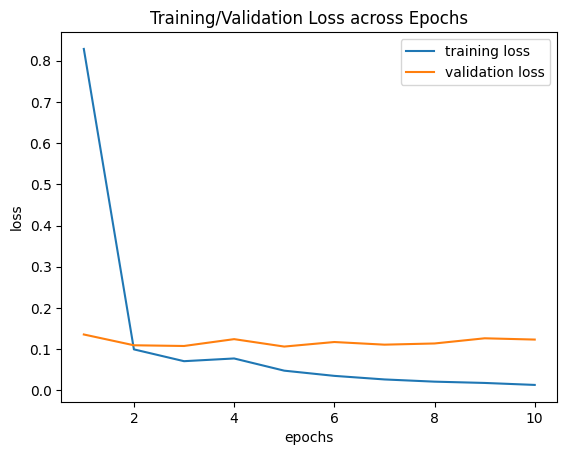

In [86]:
#Plot the loss curves for training loss and validation loss
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_loss_list,label="training loss")
plt.plot(np.arange(1,num_epochs+1),val_loss_list,label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training/Validation Loss across Epochs")
plt.legend()
plt.show()

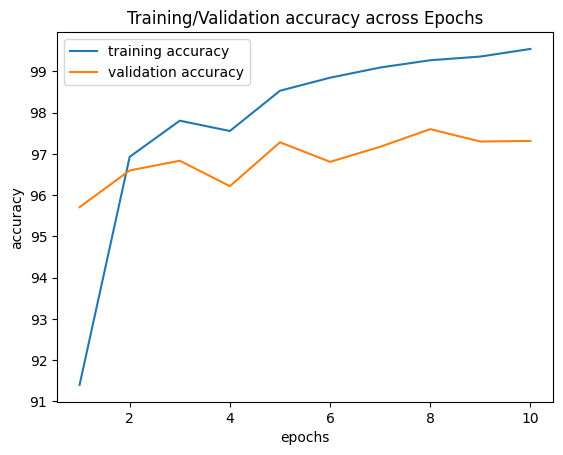

In [87]:
#Plot the accuracy curves for training accuracy and validation accuracy
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_accuracy_list,label="training accuracy")
plt.plot(np.arange(1,num_epochs+1),val_accuracy_list,label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training/Validation accuracy across Epochs")
plt.legend()
plt.show()

### There is some overfitting as the training accuracy is slightly higher at 99.36% as compared to the validation accuracy at 97.48%

In [88]:
# # VGGNetBaseline Model training
# epochs = 3
# train_minibatch_loss = []
# acuracy_list = []
# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}")
    
#     #Training
#     train_loss = 0
#     #Add a loop to loop through the training batches
#     for batch, (X,y) in enumerate(train_dataloader):
#         X,y = X.to(device), y.to(device)
        
#         #Allow configs for learning (e.g. weight updates)
#         model_0.train()

#         #Forward pass
#         y_pred = model_0(X)
#         y_pred_labels = y_pred.argmax(dim=1)
        
#         #Calculate the training loss per batch
#         loss = loss_fn(y_pred, y)
#         train_loss += loss
        
#         #Optimizer zero grad
#         optimizer.zero_grad()
        
#         #Loss backward
#         loss.backward()
        
#         #Optimizer step
#         optimizer.step()
        
        
#         #Training loss per batch for every epoch
#         train_minibatch_loss.append(loss.item())
        
#         #Print statement only at multiples of 50
#         if batch % 50 == 0:
#             print("This is the batch", batch)
#             print(f"\n Train Loss: {loss.item():.4f}")      
        
#     #Testing
#     test_loss = 0
#     #Set to eval mode to prevent auto diff.
#     model_0.eval()
#     with torch.inference_mode():
#         for X,y in val_dataloader:
#             X,y = X.to(device), y.to(device)
#             #Forward Pass
#             test_pred = model_0(X)
#             y_pred_labels = y_pred.argmax(dim=1)
            
#             #Loss function
#             loss = loss_fn(test_pred,y)
            
#             #Calculate loss accumulatively
#             test_loss += loss
            
#         #Average test loss per batch in an epoch
#         #test_loss /= len(val_dataloader)
        
#     #print(f"\n Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

### **Iterative improvement of baseline 1.** - incorporate batchnorm2d to investigate if the test accuracy can be improved even more, though 97% is considered to be a rather high score already.

### Incorporating batch normalisation before activation function since it has considerable regularisation effect.

In [89]:
class VGGNetBN(nn.Module):
    """ Replicating subset of VGGNet Architecture for MNIST. Including batch normalisation to the architecture """
    
    def __init__(self):
        super().__init__()
        
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=(3,3),stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=(3,3),stride=1,padding=1),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )
               
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=(6272),out_features=10)
        )
        
    def forward(self,x):
        x = self.block_1(x)
        x = self.classifier(x)
        return x

In [90]:
torch.manual_seed(42)
model_1 = VGGNetBN()
model_1.to(device)

VGGNetBN(
  (block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=10, bias=True)
  )
)

In [91]:
#Set up Loss function and optimizer for multi class classification
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [92]:
#VGGNetBN Model training
epochs = 10
train_loss_list = []
val_loss_list = []
train_accuracy_list = []
val_accuracy_list = []
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    
    #Training
    train_loss, train_acc = 0, 0
    #Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)
        
        #Allow configs for learning (e.g. weight updates)
        model_1.train()

        #Forward pass
        y_pred = model_1(X)
        y_pred_labels = y_pred.argmax(dim=1)
        
        #Calculate the training loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss
        #Calculate the training accuracy per batch
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred_labels)
        
        #Optimizer zero grad
        optimizer.zero_grad()
        
        #Loss backward
        loss.backward()
        
        #Optimizer step
        optimizer.step()
        
    #Average train loss per batch in an epoch and Average train accuracy per batch in an epoch
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    #Append values for plotting
    train_loss_list.append(train_loss.cpu().detach().numpy())
    #train_loss_list.append(train_loss.item())
    train_accuracy_list.append(train_acc)
        
    #Testing
    test_loss, test_acc = 0, 0
    #Set to eval mode to prevent auto diff.
    model_1.eval()
    with torch.inference_mode():
        for X,y in val_dataloader:
            X,y = X.to(device), y.to(device)
            #Forward Pass
            test_pred = model_1(X)
            y_pred_labels = test_pred.argmax(dim=1)
            
            #Calculate the validation loss per batch
            loss = loss_fn(test_pred,y)
            test_loss += loss
            #Calculate the validation accuracy per batch
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred_labels)
            
        #Average test loss per batch in an epoch and Average test accuracy per batch in an epoch
        test_loss /= len(val_dataloader)
        test_acc /= len(val_dataloader)
        #Append values for plotting
        val_loss_list.append(test_loss.cpu().detach().numpy())
        #val_loss_list.append(test_loss.item())
        val_accuracy_list.append(test_acc)
        
    print(f"\n Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
    print(f"\n Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")
        

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0

 Train Loss: 0.2093 | Test Loss: 0.1121

 Train Acc: 93.8586 | Test Acc: 96.7073
Epoch: 1

 Train Loss: 0.0744 | Test Loss: 0.0843

 Train Acc: 97.8103 | Test Acc: 97.5005
Epoch: 2

 Train Loss: 0.0542 | Test Loss: 0.0642

 Train Acc: 98.3479 | Test Acc: 98.0239
Epoch: 3

 Train Loss: 0.0425 | Test Loss: 0.0636

 Train Acc: 98.7158 | Test Acc: 98.1191
Epoch: 4

 Train Loss: 0.0356 | Test Loss: 0.0628

 Train Acc: 98.9275 | Test Acc: 98.1350
Epoch: 5

 Train Loss: 0.0297 | Test Loss: 0.0742

 Train Acc: 99.1179 | Test Acc: 97.8177
Epoch: 6

 Train Loss: 0.0256 | Test Loss: 0.0569

 Train Acc: 99.2580 | Test Acc: 98.3729
Epoch: 7

 Train Loss: 0.0213 | Test Loss: 0.0636

 Train Acc: 99.4232 | Test Acc: 98.2143
Epoch: 8

 Train Loss: 0.0183 | Test Loss: 0.0636

 Train Acc: 99.4831 | Test Acc: 98.1032
Epoch: 9

 Train Loss: 0.0154 | Test Loss: 0.0566

 Train Acc: 99.6136 | Test Acc: 98.3729


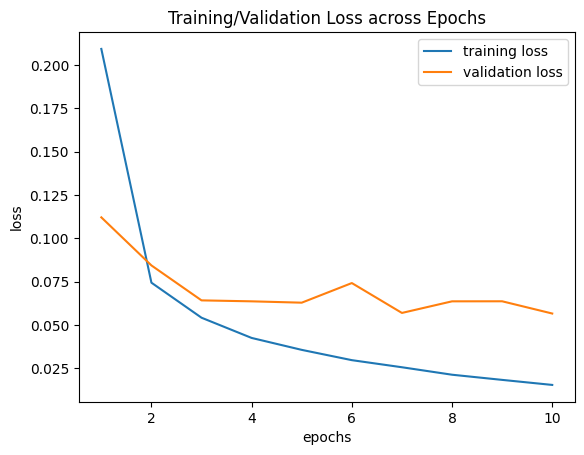

In [93]:
#Plot the loss curves for training loss and validation loss
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_loss_list,label="training loss")
plt.plot(np.arange(1,num_epochs+1),val_loss_list,label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training/Validation Loss across Epochs")
plt.legend()
plt.show()

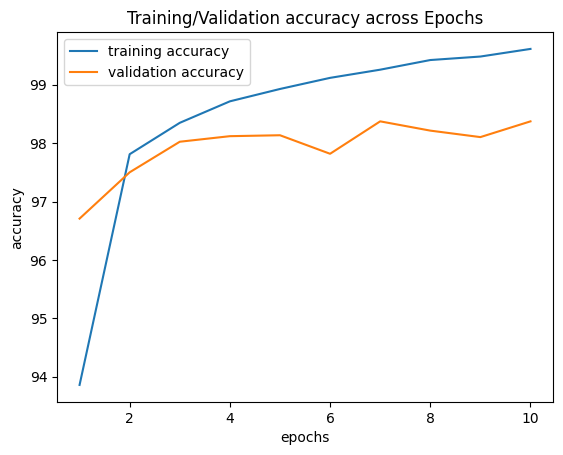

In [94]:
#Plot the accuracy curves for training accuracy and validation accuracy
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_accuracy_list,label="training accuracy")
plt.plot(np.arange(1,num_epochs+1),val_accuracy_list,label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training/Validation accuracy across Epochs")
plt.legend()
plt.show()

### There seems to be about a percentage point improvement from the baseline, suggesting that incorporation of batchnorm can be a viable addition. 

### **Iterative improvement 2** - Data Augmentation (Increasing the variability of the dataset to mitigate overfitting by allowing the model to train on random transformations)

In [95]:
train_tensors.tensors[0].shape, train_tensors.tensors[1].shape

(torch.Size([35700, 1, 28, 28]), torch.Size([35700]))

In [96]:
#Retrieve the number of rows in the tensor dataset
train_tensors.tensors[0].shape[0]

35700

In [97]:
#Retrieve the item from the tensor dataset
print(train_tensors.tensors[1][11] )
train_tensors.tensors[0][10], train_tensors.tensors[0][10].shape

tensor(2)


(tensor([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0., 129., 254.,  30.,   0.,   0.,
             0.,   0.,   0.,   0.,   0

In [98]:
class MNISTDatasetDataAug(Dataset):
    """Custom dataset class for data augmentation of MNIST data"""
    def __init__(self,data_df,transform):
        self.tensor_dataset = data_df
        self.transform = transform
    
    def __len__(self):
        """Need to overide this method as mentioned in docs."""
        number_rows = self.tensor_dataset.tensors[0].shape[0]
        return number_rows
    
    def __getitem__(self,index):
        """Need to overide this method as mentioned in docs."""
        image = self.tensor_dataset.tensors[0][index]
        label = self.tensor_dataset.tensors[1][index]
        if self.transform:
            image = self.transform(image)
        return (image,label)

In [99]:
#Batch Size hyperparameter
batch_size = 32

#train_tensors = torch.utils.data.TensorDataset(X_train,y_train)
#val_tensors = torch.utils.data.TensorDataset(X_val,y_val)
train_transform = transforms.Compose([transforms.RandomRotation(15),
                                     transforms.RandomAffine(degrees=10)])

# Turn dataset into iterables of mini batches
#Shuffle is true for training to prevent learning of spurious correlation or noise
train_tensors = MNISTDatasetDataAug(train_tensors,train_transform)
train_dataloader = DataLoader(train_tensors, batch_size=batch_size, shuffle=True)

val_tensors = MNISTDatasetDataAug(val_tensors,None)
val_dataloader = DataLoader(val_tensors, batch_size=batch_size, shuffle=False)

print(f"Dataloaders: {train_dataloader,val_dataloader}")
print(f"Length of train dataloaders: {len(train_dataloader)} of batch size {batch_size}")
print(f"Length of validation dataloaders: {len(val_dataloader)} of batch size {batch_size}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c89fcc46680>, <torch.utils.data.dataloader.DataLoader object at 0x7c89fcd09db0>)
Length of train dataloaders: 1116 of batch size 32
Length of validation dataloaders: 197 of batch size 32


In [100]:
class VGGNetBNDataAug(nn.Module):
    """ Replicating subset of VGGNet Architecture for MNIST. Including batch normalisation &
        Data Augmentation to the architecture.
    """
    
    def __init__(self):
        super().__init__()
        
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=(3,3),stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=(3,3),stride=1,padding=1),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )
               
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=(6272),out_features=10)
        )
        
    def forward(self,x):
        x = self.block_1(x)
        x = self.classifier(x)
        return x

In [101]:
torch.manual_seed(42)
model_2 = VGGNetBNDataAug()
model_2.to(device)

VGGNetBNDataAug(
  (block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=10, bias=True)
  )
)

In [102]:
#Set up Loss function and optimizer for multi class classification
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [103]:
#VGGNetBNDataAug Model training
epochs = 10
train_loss_list = []
val_loss_list = []
train_accuracy_list = []
val_accuracy_list = []
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    
    #Training
    train_loss, train_acc = 0, 0
    #Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)
        
        #Allow configs for learning (e.g. weight updates)
        model_2.train()

        #Forward pass
        y_pred = model_2(X)
        y_pred_labels = y_pred.argmax(dim=1)
        
        #Calculate the training loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss
        #Calculate the training accuracy per batch
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred_labels)
        
        #Optimizer zero grad
        optimizer.zero_grad()
        
        #Loss backward
        loss.backward()
        
        #Optimizer step
        optimizer.step()
        
    #Average train loss per batch in an epoch and Average train accuracy per batch in an epoch
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    #Append values for plotting
    train_loss_list.append(train_loss.cpu().detach().numpy())
    #train_loss_list.append(train_loss.item())
    train_accuracy_list.append(train_acc)
        
    #Testing
    test_loss, test_acc = 0, 0
    #Set to eval mode to prevent auto diff.
    model_2.eval()
    with torch.inference_mode():
        for X,y in val_dataloader:
            X,y = X.to(device), y.to(device)
            #Forward Pass
            test_pred = model_2(X)
            y_pred_labels = test_pred.argmax(dim=1)
            
            #Calculate the validation loss per batch
            loss = loss_fn(test_pred,y)
            test_loss += loss
            #Calculate the validation accuracy per batch
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred_labels)
            
        #Average test loss per batch in an epoch and Average test accuracy per batch in an epoch
        test_loss /= len(val_dataloader)
        test_acc /= len(val_dataloader)
        #Append values for plotting
        val_loss_list.append(test_loss.cpu().detach().numpy())
        #val_loss_list.append(test_loss.item())
        val_accuracy_list.append(test_acc)
        
    print(f"\n Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
    print(f"\n Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")
        

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0

 Train Loss: 0.2904 | Test Loss: 0.1201

 Train Acc: 91.3530 | Test Acc: 96.3085
Epoch: 1

 Train Loss: 0.1229 | Test Loss: 0.0879

 Train Acc: 96.1806 | Test Acc: 97.5208
Epoch: 2

 Train Loss: 0.1012 | Test Loss: 0.0705

 Train Acc: 96.8218 | Test Acc: 98.0126
Epoch: 3

 Train Loss: 0.0892 | Test Loss: 0.0779

 Train Acc: 97.3353 | Test Acc: 97.6908
Epoch: 4

 Train Loss: 0.0800 | Test Loss: 0.0618

 Train Acc: 97.4894 | Test Acc: 98.1395
Epoch: 5

 Train Loss: 0.0715 | Test Loss: 0.0575

 Train Acc: 97.7963 | Test Acc: 98.2166
Epoch: 6

 Train Loss: 0.0685 | Test Loss: 0.0513

 Train Acc: 97.7571 | Test Acc: 98.4205
Epoch: 7

 Train Loss: 0.0636 | Test Loss: 0.0535

 Train Acc: 98.0399 | Test Acc: 98.3593
Epoch: 8

 Train Loss: 0.0639 | Test Loss: 0.0507

 Train Acc: 97.9363 | Test Acc: 98.4545
Epoch: 9

 Train Loss: 0.0580 | Test Loss: 0.0464

 Train Acc: 98.0847 | Test Acc: 98.5633


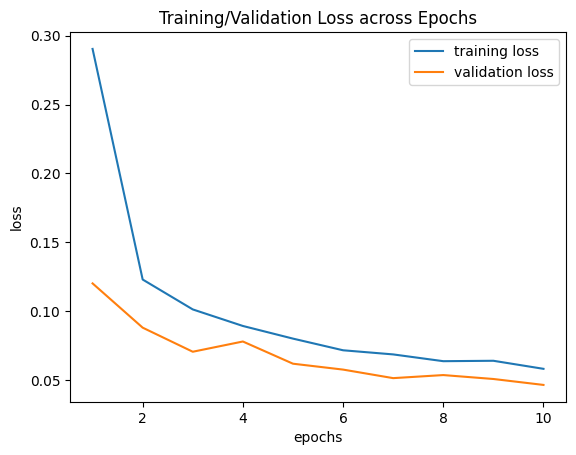

In [104]:
#Plot the loss curves for training loss and validation loss
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_loss_list,label="training loss")
plt.plot(np.arange(1,num_epochs+1),val_loss_list,label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training/Validation Loss across Epochs")
plt.legend()
plt.show()

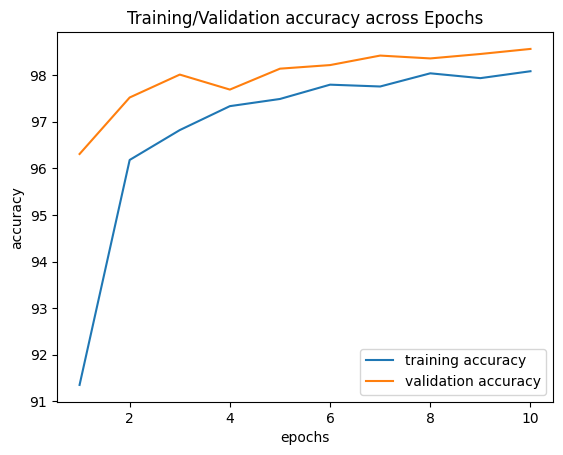

In [105]:
#Plot the accuracy curves for training accuracy and validation accuracy
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_accuracy_list,label="training accuracy")
plt.plot(np.arange(1,num_epochs+1),val_accuracy_list,label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training/Validation accuracy across Epochs")
plt.legend()
plt.show()

### There is a marignal improvement of about 0.2% for the validation accracy. Data Augmentation can be a good addition to the model and the improvements can be even greater if the number of epochs increases or a more robust transformation is adopted (since the transformations are slightly conservative in nature)